In [1]:
import numpy as np, local, binning as bn, plottools as pl
from matplotlib.pyplot import *

In [2]:
#qids = local.qid_all
qids = ['boss_s15d']
qids = ['boss_s15n']
#qids = local.boss_dn

In [3]:
aobj = {q: local.init_analysis_params(qid=q,fltr='cinv') for q in qids}
#ocl  = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1] for q in qids}
ocl  = {q: (np.loadtxt(aobj[q].fcls['c'][1])).T[1] for q in qids}
mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1] for q in qids}
vcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[7] for q in qids}

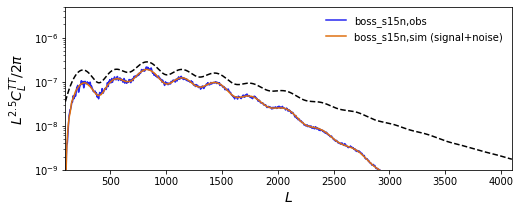

In [4]:
for q in qids:
    pl.plot_1dstyle(fsize=[8,3],xmin=100,xmax=4096,ymin=1e-9,ymax=5e-6,xlab=r'$L$',ylab=r'$L^{2.5} C^{TT}_L/2\pi$',ylog=True)
    l = aobj[q].l
    s = l**3/2./np.pi
    plot(l,s*ocl[q],label=q+',obs')
    plot(l,s*mcl[q],label=q+',sim (signal+noise)')
    plot(l,s*aobj[q].lcl[0,:],color='k',ls='--')
    legend()
    show()

[ 29.54887928  35.09407546  73.80985246  81.19310068  88.79923965
  92.45138978 101.65337618  98.48103879 122.56603099  97.48712374
 119.17112628 101.91752845 101.44308294 144.04377406 113.54501505
 215.4658212  154.63623237 161.10182504 266.4227052  246.58145754]


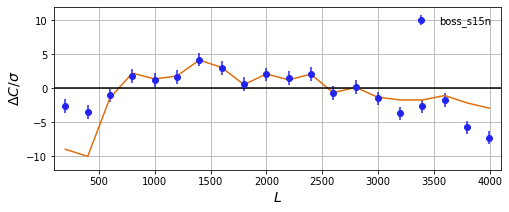

<Figure size 576x216 with 0 Axes>

In [5]:
mb = bn.multipole_binning(20,lmin=100,lmax=4096)
for q in qids:
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj[q].fcls['c'][:10],cn=1)
    print(mcb/vcb)
    #cor = pl.plot_corr(scb,mb.bc,output=True)
    #print(cor)
    pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-12,ymax=12,ylab=r'$\Delta C/\sigma$')
    errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=q)
    plot(mb.bc,100*(ocb/mcb-1))
    axhline(0,color='k')
    legend()
    show()
    clf()